<h1>Parameter space exploration</h1>

In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
import plotly.express as px

import numpy as np
%matplotlib nbagg

In [2]:
import numpy as np
np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    print('hey')
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)

display(f)

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
               …

In [21]:
steps = 1001

gamma_range = [0,5]
delta_range = [0,10]
nu_range = [0,50]
nu_max = 40.

## defining functions
def p_nu(NU,gamma,delta,nu_max):

    return gamma / ( nu_max * np.sqrt( -np.pi * np.log( NU / nu_max ) ) ) * \
        np.exp( - delta**2/2.) * ( NU / nu_max )**(gamma**2 - 1) * \
        np.cosh( gamma * delta * np.sqrt( -2 * np.log( NU / nu_max) ) )

def get_nu_bar(gamma,delta,nu_max):
    return nu_max * gamma / np.sqrt(gamma**2 + 1) * np.exp(-delta**2 / (2*(1+gamma**2)))

def get_nu_peak(gamma,delta,nu_max):
    return nu_max * np.exp( - (gamma**2 * delta**2 - 2*(gamma**2 - 1) + gamma * delta *np.sqrt(gamma**2 * delta**2 - 4*(gamma**2 - 1))) / (4 * (gamma**2 - 1)**2))
    
def get_chi(gamma,delta,nu_max):
    return -np.log10(get_nu_peak(gamma,delta,nu_max)/get_nu_bar(gamma,delta,nu_max))

In [11]:
## build gamma and delta arrays (with tile)
## run through "get_nu_peak" and "get_nu_mean" to obtain chi
delta_x, gamma_y = np.meshgrid(np.linspace(*delta_range,steps), np.linspace(*gamma_range,steps), indexing='xy')
chi = get_chi(gamma_y,delta_x,nu_max)

/tmp/ipykernel_35935/2059821453.py:13: RuntimeWarning:

invalid value encountered in sqrt

/tmp/ipykernel_35935/2059821453.py:13: RuntimeWarning:

divide by zero encountered in true_divide

/tmp/ipykernel_35935/2059821453.py:13: RuntimeWarning:

invalid value encountered in true_divide

/tmp/ipykernel_35935/2059821453.py:16: RuntimeWarning:

divide by zero encountered in true_divide

/tmp/ipykernel_35935/2059821453.py:16: RuntimeWarning:

divide by zero encountered in log10



<IPython.core.display.Javascript object>


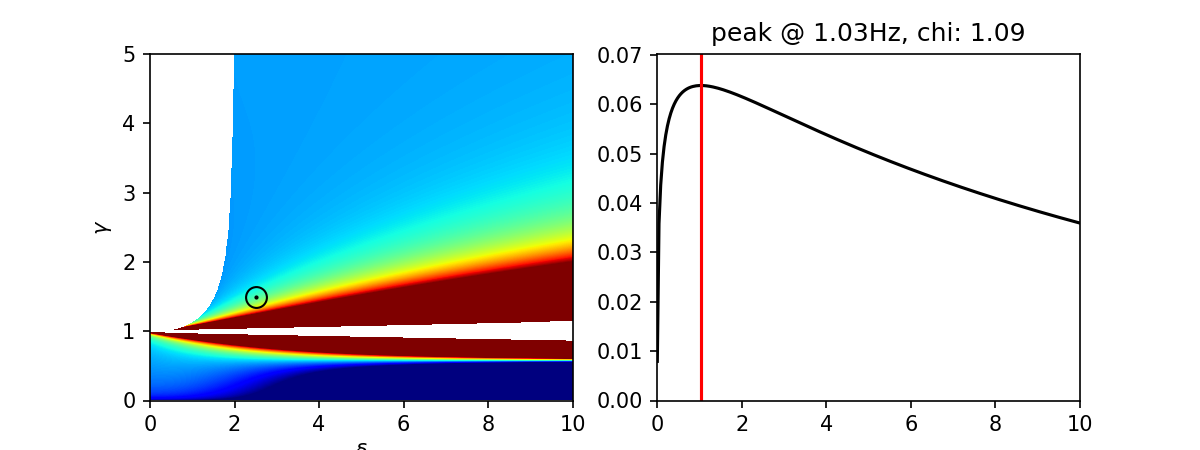

/tmp/ipykernel_35935/2059821453.py:5: RuntimeWarning:

invalid value encountered in sqrt

/tmp/ipykernel_35935/2059821453.py:7: RuntimeWarning:

invalid value encountered in sqrt



interactive(children=(FloatSlider(value=1.5, description='$\\displaystyle \\gamma$', max=5.0, step=0.01), Floa…

In [20]:
gamma = 1.5
delta = 2.5


fig,ax = plt.subplots(1,2,figsize=(8,3))

chi_plt = ax[0].imshow(chi,origin='lower',extent=[*delta_range,*gamma_range],aspect='auto',cmap='jet',vmin=-2,vmax=5)
plt.setp(ax[0],
         xlabel='$\delta$',
         ylabel=r'$\gamma$'
)

global init 
init = True
pos, = ax[0].plot(delta,gamma,'ok',ms=10,fillstyle='none')
pos_in, = ax[0].plot(delta,gamma,'ok',ms=1)
x_arr = np.linspace(1/steps,nu_max,steps)
distr, = ax[1].plot(x_arr,p_nu(x_arr,gamma,delta,30.),'k-')
        
gamma_widget = widgets.FloatSlider(gamma,min=gamma_range[0],max=gamma_range[1],step=0.01,orientation='horizontal',description=r'$\displaystyle \gamma$')
delta_widget = widgets.FloatSlider(delta,min=delta_range[0],max=delta_range[1],step=0.1,orientation='horizontal',description=r'$\displaystyle \delta$')
nu_max_widget = widgets.FloatText(nu_max)

def update_plot(gamma,delta,nu_max):
    
    ## update firing rate distribution
    x_arr = np.linspace(1/steps,nu_max,steps)
    new_distr = p_nu(x_arr,gamma,delta,nu_max)   
    
    chi = get_chi(gamma,delta,nu_max)
    #print(f'chi: {:.2f}'.format(chi))
        
    distr.set_xdata(x_arr)
    distr.set_ydata(new_distr)
    nu_peak = get_nu_peak(gamma,delta,nu_max)
    ax[1].set_title("peak @ {:.2f}Hz, chi: {:.2f}".format(nu_peak,chi))
        
    global mean_val, peak_val
    try:
        mean_val.remove()
        peak_val.remove()
    except:
        pass
        
    mean_val = ax[1].vlines(get_nu_bar(gamma,delta,nu_max),0,5)
    peak_val = ax[1].vlines(get_nu_peak(gamma,delta,nu_max),0,5,color='r')
    plt.setp(ax[1],xlim=[0,10],ylim=[0,max(new_distr)*1.1])
    
    pos.set_xdata(delta)
    pos.set_ydata(gamma)
    pos_in.set_xdata(delta)
    pos_in.set_ydata(gamma)
    
    plt.show()
    
widgets.interactive(update_plot,gamma=gamma_widget,delta=delta_widget,nu_max=nu_max_widget)

In [4]:
import plotly.graph_objects as go
import plotly.express as px

#fig = px.imshow(chi,origin='lower',aspect='auto',zmin=-2,zmax=5,
#                color_continuous_scale='jet',
#               x=np.linspace(*delta_range,steps),
#               y=np.linspace(*gamma_range,steps),
#               labels={'x':'delta','y':'gamma','color':'chi'})
#fig.show()